For 一橋大学　統計ゼミ 2023/07/04  
文責：Kazuki Kikunaga

### settings

In [1]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

%matplotlib inline

In [2]:
def showfig():
    plt.legend(loc="lower right")
    plt.xlabel("IV")
    plt.ylabel("DV")
    plt.show()
def random_line(X, inter, coef):
    return inter + X*coef

In [3]:
np.random.seed(0)
lr = linear_model.LinearRegression()

# Today's Program
* Goal
* Terminology
* Use of Linear Regression analysis
* Simple Linear Regression
* Multiple Linear Regression
* Hands-on practice with HAD (→奥山くん)

##### 注意：今回は母集団と標本の違いについて事前知識がない前提で話します。（統計ゼミで触れてない＆分布とかの説明は後回しにしたほうがよいとのお話があったので。）そのため、推定に関する話は回避してます。

# Goal
* Linear Regressionとはなにかが説明できる
* Multiple Linear RegressionがHADで正しく実行できる
* Multiple Linear RegressionのHADの結果を理解できる

# Terminology

### Regression analysis
Wikipediaによると、、、  
英語： [In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable, or a 'label' in machine learning parlance) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion.](https://en.wikipedia.org/wiki/Regression_analysis)  
日本語： [回帰（かいき、（英: regression）とは、統計学において、Y が連続値の時にデータに Y = f(X) というモデル(「定量的な関係の構造[1]」)を当てはめること。別の言い方では、連続尺度の従属変数（目的変数）Y と独立変数（説明変数）X の間にモデルを当てはめること。X が1次元ならば単回帰、X が2次元以上ならば重回帰と言う。Y が離散の場合は分類と言う。回帰分析（かいきぶんせき、（英: regression analysis）とは、回帰により分析すること。回帰で使われる、最も基本的なモデルは Y=AX+B という形式の線形回帰である。](https://ja.wikipedia.org/wiki/%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90)  
<br>
簡単に言うと  
「回帰分析とは、数式を使って変数間の関係を示して分析する」  
ってところでしょうか。  
今回は、基本的なモデルである、Linear regression(線形回帰)について勉強しましょう。
<br>


### Varibales
Wikipediaにあるように変数の呼び方は分野毎に色々あります。  

| 結果っぽいもの | 原因っぽいもの |
| :---: | :---: |
| 従属変数 (DV) | 独立変数 (IV) |
| 目的変数 | 説明変数 |
| 結果変数 | 暴露変数 |
| 応答変数 | 予測変数 |
| ターゲット | 特徴量 |
| etc. | etc. |

# Use of Linear Regression analysis  
一口に統計解析といっても大きく3つの使用目的があります。
* Diagnostic analytics
    * What happened?
* Predictive analytics
    * What will happen?
* <font color="grey">(Prescriptive analytics)</font>
    * <font color="grey">What action(s) will be the best?</font></font>

回帰分析は前二者と直接的に関わっているので、特にDiagnosticな目的での利用が疫学、心理学では多いですね。

# Simple Linear Regression

### Example

DV = 0 + 79.17*IV　にノイズを加えて作ったデータ


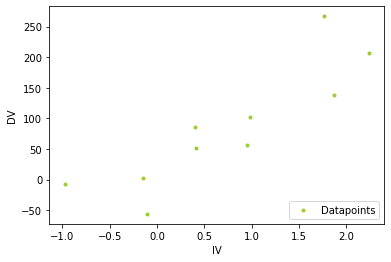

DV = 200 - 40*IV　（いい加減に引いた線を予測線とした場合）
J(θ): 240069.53


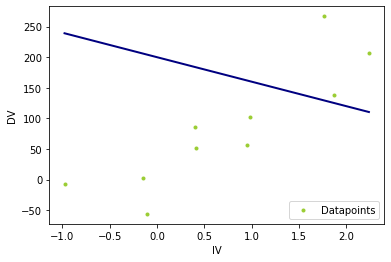

DV = 84.61 (DVの平均値を予測線とした場合)
J(θ): 88248.16


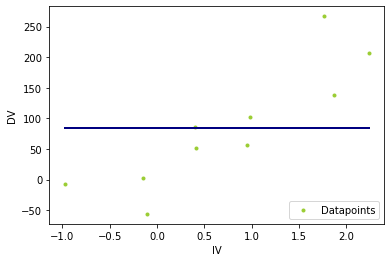

DV = 22.35 + 84.36*IV　（回帰分析にに基づいた予測線）
J(θ): 21694.54


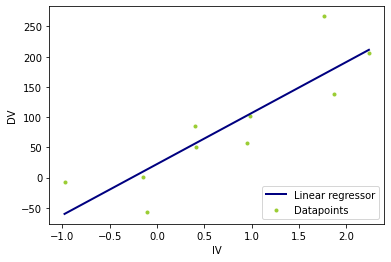

In [4]:
# dataset
## サンピルサイズとノイズが予測に与える影響を話したいときは下記を変化させる　（n_samples = 10、noise_size = 50がわかりやすい）
n_samples = 10
noise_size = 50

X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    bias = 0,
    noise=noise_size,
    coef=True,
    random_state=0
)
print("DV = 0 + ", round(np.atleast_1d(coef)[0],2), "*IV", "　にノイズを加えて作ったデータ",sep="")
plt.scatter(X, y, color="yellowgreen", marker=".", label="Datapoints")
showfig()

# 意味のない線
plt.scatter(X, y, color="yellowgreen", marker=".", label="Datapoints")
line_X = np.linspace(X.min(), X.max())[:, np.newaxis]
line_y = random_line(line_X,200,-40)
print("DV = 200 - 40*IV　（いい加減に引いた線を予測線とした場合）")
SSE = round(mean_squared_error(y, random_line(X,200,-40))*n_samples,2)
print("J(\u03B8):",SSE)
plt.plot(line_X, line_y, color="navy", linewidth=2)
showfig()

# 平均のみを使った線
plt.scatter(X, y, color="yellowgreen", marker=".", label="Datapoints")
line_X = np.linspace(X.min(), X.max())[:, np.newaxis]
line_y = random_line(line_X,np.mean(y),0)
print("DV = ", round(np.mean(y),2)," (DVの平均値を予測線とした場合)", sep ="")
SSE = round(mean_squared_error(y, random_line(X,np.mean(y),0))*n_samples,2)
print("J(\u03B8):",SSE)
plt.plot(line_X, line_y, color="navy", linewidth=2)
showfig()

# 回帰線
lr.fit(X, y)
line_X = np.linspace(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
print("DV = ", round(lr.intercept_, 2), " + ", round(lr.coef_[0], 2), "*IV　（回帰分析にに基づいた予測線）", sep = "")
SSE = round(mean_squared_error(y, lr.predict(X))*n_samples,2)
print("J(\u03B8):",SSE)
plt.scatter(X, y, color="yellowgreen", marker=".", label="Datapoints")
plt.plot(line_X, line_y, color="navy", linewidth=2, label="Linear regressor")
showfig()

### Formula

流れとしては、こんな感じ
1. モデルつくる
2. Cost functionをつくる
3. Cost functionを最小化するパラメータをみつける

#####  1　モデルをつくる
まずはxに基づいて予測を行うモデルをつくっていきます。

$$
h_{\theta}(x) = \theta_0 + \theta_1x
$$

これがSimple linear regressionのモデルですね。名前のまま、簡単な線形な関係を示してますね。  
ちなみに、図にすると$\theta_0$は切片、$\theta_1$は傾きになります。

##### 2. Cost functionをつくる

1でつくったモデルによる予測と実際のデータのずれを示すためのCost functionをつくります。

$$
J(\theta_0,\theta_1) = \displaystyle \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2
$$

上記が、今回のCost functionになります。  
最小二乗法 (Ordinary Least Squares (OLS)) と呼ばれるものですね。  
名前の通り、予測した値と実測値の差の二乗を足したものを最小化したいのですね。  
ちなみに、「今回の」でお察しの通り、Cost functionは色々作れます。有名なものは最尤推定(Maximum Likelihood Estimation(MLE))ですね。（といっても、Linear regressionではOLSとMLEは同じものになりますが）

##### 3. Cost functionを最小化するパラメータをみつける
上記のCost functionを最小化するパラメータ$\theta_0$と$\theta_1$を求めていきます。  
求め方は下記を使ったものが有名ですね。
* Normal Equation
* Gradient Descent

今回は、初学者向けということですので、詳細はスキップしますが、$\theta_0$と$\theta_1$が（基本的に）一つに定まります。  
上の例では、$\theta_0$が22.35、$\theta_1$が84.36となったわけですね。

これがSimple Linear Regressionの中身ですね。

# Multiple Linear Regression

### Example

このようなデータがあったとします


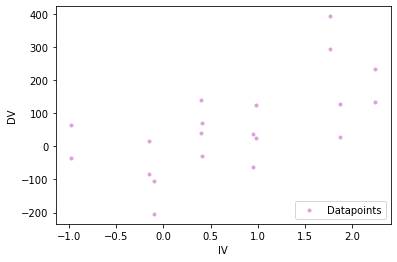

実は、このデータはtype1とtype2に分けられます
同じような分布ですが、type2のほうが下にある気がしますね


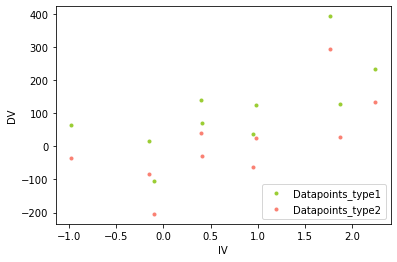

全体で回帰したとき（navy）とtype1（yellowgreen）、type2（salmon）を区別してそれぞれ回帰したときを比べてみましょう。

navy色の予測式：　DV = -5.3 + 89.54*IV
J(θ): 111778.17
yellowgreen色の予測式：　DV = 44.7 + 89.54*IV
J(θ): 86778.17
salmon色の予測式：　DV = -55.3 + 89.54*IV
J(θ): 86778.17


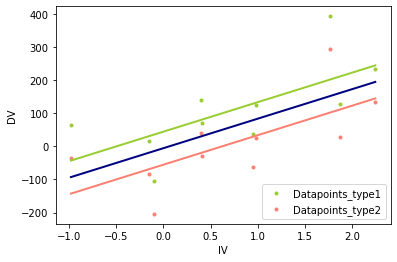

type毎に区別して回帰線を引いたほうが、それぞれのDatapointsからのずれが少なくなってることがわかりますね


In [5]:
# 特徴量を加えると予測が良くなることを例示のみとして使用。
# 計算自体は、multiple linear regressionではないので注意。

n_samples = 10 #変えない
# dataset 1　
X_1, y_1, coef_1 = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    bias = 0,
    noise=100,
    coef=True,
    random_state=0
)

# dataset 2　（dataset 1に-100のbiasを加えたもの）
X_2, y_2, coef_2 = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    bias = -100,
    noise=100,
    coef=True,
    random_state=0
)

X_total = np.concatenate([X_1,X_2])
y_total = np.concatenate([y_1,y_2])

print("このようなデータがあったとします")
plt.scatter(X_total, y_total, color="plum", marker=".", label="Datapoints")
showfig()

print("実は、このデータはtype1とtype2に分けられます")
print("同じような分布ですが、type2のほうが下にある気がしますね")
plt.scatter(X_1, y_1, color="yellowgreen", marker=".", label="Datapoints_type1")
plt.scatter(X_2, y_2, color="salmon", marker=".", label="Datapoints_type2")
showfig()


print("全体で回帰したとき（navy）とtype1（yellowgreen）、type2（salmon）を区別してそれぞれ回帰したときを比べてみましょう。")
print()

plt.scatter(X_1, y_1, color="yellowgreen", marker=".", label="Datapoints_type1")
plt.scatter(X_2, y_2, color="salmon", marker=".", label="Datapoints_type2")
for X,y,color in [[X_total,y_total,"navy"],[X_1,y_1,"yellowgreen"],[X_2,y_2,"salmon"]]:
    lr.fit(X, y)
    SSE = round(mean_squared_error(y, lr.predict(X))*n_samples,2)
    print(color,"色の予測式：　DV = ", round(lr.intercept_, 2), " + ", round(lr.coef_[0], 2), "*IV", sep = "")
    print("J(\u03B8):",SSE)
    line_X = np.linspace(X.min(), X.max())[:, np.newaxis]
    line_y = lr.predict(line_X)
    plt.plot(line_X, line_y, color=color, linewidth=2)

showfig()

print("type毎に区別して回帰線を引いたほうが、それぞれのDatapointsからのずれが少なくなってることがわかりますね")

### Formula

Simple linear regressionの拡張版ですね。求め方も同じです。

#####  1　モデルをつくる

$$
h_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \cdots + \theta_{(n-1)}x_{(n-1)} + \theta_nx_n
$$

##### 2. Cost functionをつくる

$$
J(\theta_0,\theta_1,\theta_2,\theta_3,  \cdots ,\theta_{n-1},\theta_n) = \displaystyle \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2
$$

##### 3. Cost functionを最小化するパラメータをみつける
略

##### Formula　（Matrix）

行列で書くと簡単にかけますね。

$$
h_\mathbf{\theta}(\mathbf{X}) = \mathbf{X}\mathbf{\theta}
$$

$$
J(\mathbf{\theta}) = (h_\mathbf{\theta}(\mathbf{X})-\mathbf{y})^\mathrm{ T }(h_\mathbf{\theta}(\mathbf{X})-\mathbf{y})
$$

Normal equationを使うと$J(\mathbf{\theta})$を最小する$\mathbf{\theta}$も一行で求められます。

$$
\mathbf{\theta} = (\mathbf{X}^\mathrm{ T }\mathbf{X})^{-1}\mathbf{X}^\mathrm{ T }y
$$

### Pithalls

##### DVとIVが非直線的な関係性の場合
上記のものをそのまま適用するとDVとIVが非直線的な関係性の場合うまくフィットしません。  
下の図のような関係だときれいにフィットしませんね。  
そのようなときは、変更を加える必要があります。  
下のようなものが有名ですね。
* IVのべき乗やIV同士の乗法の項などを$h(\theta)$に加える
* $h(\theta)$に変更を加える
* DVに変更を加える

DV = 10*IV^2にノイズを加えて作ったデータです


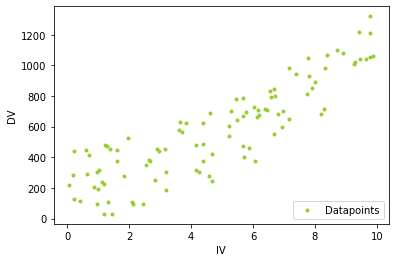

navyの予測式：　DV = 129.26 + 93.37*IV
J(θ): 214034.56
redの予測式：　DV = 234.54 + 25.51*IV + 7.03*IV^2
J(θ): 185483.39


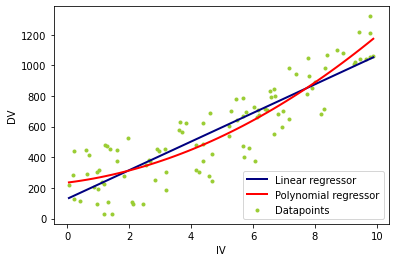

In [6]:
# dataset
X = 10*np.random.rand(100,1)
y = 10*((X)**(2)) + 500*np.random.rand(100,1)
print("DV = 10*IV^2にノイズを加えて作ったデータです")
plt.scatter(X, y, color="yellowgreen", marker=".", label="Datapoints")
showfig()

# simple linear regression
plt.scatter(X, y, color="yellowgreen", marker=".", label="Datapoints")
lr.fit(X, y)
print("navyの予測式：　DV = ", np.round(lr.intercept_, 2)[0], " + ", np.round(lr.coef_, 2)[0][0], "*IV", sep = "")
SSE = round(mean_squared_error(y, lr.predict(X))*n_samples,2)
print("J(\u03B8):",SSE)
line_X = np.linspace(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
plt.plot(line_X, line_y, color="navy", linewidth=2, label="Linear regressor")

# adding sqaured term
polynomial_features= PolynomialFeatures(include_bias=False,degree=2)
X_poly = polynomial_features.fit_transform(X)
lr.fit(X_poly, y)
print("redの予測式：　DV = ", np.round(lr.intercept_, 2)[0], " + ", np.round(lr.coef_, 2)[0][0], "*IV"\
      , " + ", np.round(lr.coef_, 2)[0][1], "*IV^2", sep = "")
SSE = round(mean_squared_error(y, lr.predict(X_poly))*n_samples,2)
print("J(\u03B8):",SSE)
line_X = np.linspace(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(polynomial_features.fit_transform(line_X))
plt.plot(line_X, line_y, color="red", linewidth=2, label="Polynomial regressor")
showfig()

今回は2乗の項を加えて調整してしみました。  
フィッティングの精度が上がっていますね。  
細かくみたいときは、Fitted values vs Residuals plotをみるのが一般的ですね。

##### Overfitting
上でみたようにIVを加えていてくとフィッティングの精度があがっていきますが、当てはめに使ったデータに即しすぎてしまうこと（Overfitting）があります。  
例えば下のようなデータの場合、直感的には直線的な関係性を予想しますよね？

DV = 0 + 51.8*IV　にノイズを加えて作ったデータ


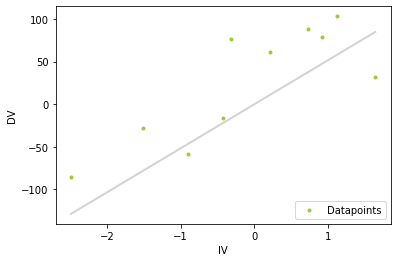

In [7]:
n_samples = 10
noise_size = 50

#dataset
X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    bias = 0,
    noise=noise_size,
    coef=True,
    random_state=6
)
print("DV = 0 + ", round(np.atleast_1d(coef)[0],2), "*IV", "　にノイズを加えて作ったデータ",sep="")
plt.scatter(X, y, color="yellowgreen", marker=".", label="Datapoints")
line_X = np.linspace(X.min(), X.max())[:, np.newaxis]
line_y = coef*line_X
plt.plot(line_X, line_y, color="lightgrey", linewidth=2)
showfig()

4次元の項までいれた予測式


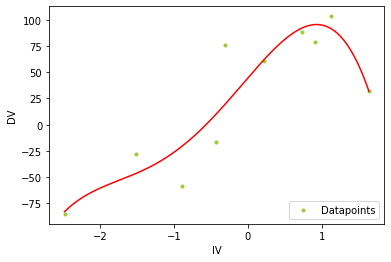

In [8]:
# n_dimentionを変えることで違いをみれる(4がわかりやすい)
n_dimention = 4
p4 = np.polyfit(X.flatten(), y.flatten(), n_dimention) 
xp = np.linspace(X.min(), X.max(), 1000)
p = np.poly1d(p4)
print(str(n_dimention)+"次元の項までいれた予測式")

plt.scatter(X, y, color="yellowgreen", marker=".", label="Datapoints")
plt.plot(xp, p(xp), c='r')
showfig()

ノイズにだいぶ引っ張られてしまってますね。  
疫学では、Datapointの7〜10分の1個くらいまでの項数がよいと慣習的にされています。

##### Multicollinearity
「マルチコ」と略されたりするやつですね。  
簡単に言うとIV間の相関が高い場合、当該IVの$\theta$の推定が悪くなるというものですね。特に完全に相関していると手法によっては$\theta$自体が算出できなくなります。  
VIFという値をみることでマルチコが起きているかどうかを確認するのが一般的ですね。

##### 残差について
実測値（y）と推定値（$h_{\theta}(x)$）の差を残差と言いますが、それが下記の条件を満たしていないと、うまく推定が行えないので注意！  
一般的な確認方法も記載します。
* 独立同一分布（i.i.d）に従うこと
    * Durbin-Watson test
* 正規分布していること
    * Q-Q plot, Jarque Bera Test
* heteroscedasticityであること（分散が同じであること）
    * Fitted values vs Residuals plot

他にもいろいろとありますが、今回はここらでやめておきましょう。またの機会に！

# Thank youuuuu